## Agent-based model

In [24]:
from numpy.random import randint, rand

In [25]:
class Person():
    """
    An agent representing a person.
    
    By default, a person is susceptible.  
    
    They can become removed using the remove method. 
    
    They can become infected using the infected mothod.
    
    """
    
    def __init__(self):
        self.state = "S" 
    
    def get_state(self):
        """
        returns the state of a person:"S","I" or "R"
        """
        return self.state

    
    def remove(self):
        """
        to make a person recovered
        """
        self.state = "R"
        
    def infected(self):
        """
        to make a person infected
        """
        self.state = "I"
        

In [134]:
def count_infectious(pop):
    """
    count how many people are infectious at the end of the day
    
    """
    return sum((p.get_state() == "I") for p in pop)

def count_removed(pop):
    """
    count how many people are recovered at the end of the day
    
    """
    return sum((p.get_state() == "R") for p in pop)

def count_susceptible(pop):
    """
    count how many people are susceptible at the end of the day
    
    """
    return sum((p.get_state() == "S") for p in pop)


In [ ]:
def sir_model_simulation(N, b, k, T):    
    """
    simulate a population, where people interact and change state according to the model parameters.
    
    N: N individuals the population has
    
    b: the number of interactions each day that could spread the disease (per individual)
    
    k: the fraction of the infectious population which recovers each day
    
    T: simulation time period
    
    """
    pop = [Person() for i in range(N)] # our population
    pop[0].infected()
    counts_I = [count_infectious(pop)]
    counts_R = [count_removed(pop)]
    counts_S = [count_susceptible(pop)]
    
    for t in range(T):
        for i in range(N):
            if pop[i].get_state()=="I":  
                
                contacts = randint(N, size=int(b)+1)
                if b >= 1:
                    for j in contacts[:-1]:
                        if pop[j].get_state()=="S":
                            pop[j].infected()
                            
                j = contacts[-1]
                if (rand() < (b-int(b))) and (pop[j].get_state()=="S"):
                    pop[j].infected()
                           
                
                if rand() < k:
                    pop[i].remove()
                
        # add to our counts
        counts_I.append(count_infectious(pop))
        counts_R.append(count_removed(pop))
        counts_S.append(count_susceptible(pop))
    return counts_I,counts_R,counts_S

In [135]:
N = 5000
b = 1/2
k = 1/3
T = 100
counts_I,counts_R,counts_S = sir_model_simulation(N, b, k, T) 

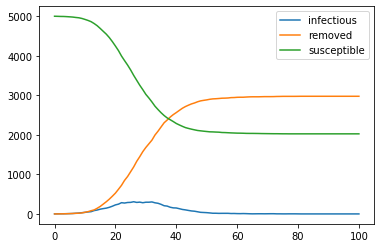

In [136]:
import matplotlib.pyplot as plt

plt.plot(counts_I,label="infectious")
plt.plot(counts_R,label="removed")
plt.plot(counts_S,label="susceptible")
plt.legend()
plt.show()

## Differential Equations

In [116]:
# all scripts used to run code

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(t, v):
    return [-b * v[0] * v[1], b * v[0] * v[1] - k * v[1], k * v[1]]

def ODE_simulation(N,b,k,T):
    """
    An ODE simulation that model time dependent variables: S, I, R
    
    N: N individuals the population has
    
    b: the number of interactions each day that could spread the disease (per individual)
    
    k: the fraction of the infectious population which recovers each day
    
    T: simulation time period
    
    """
    v0 = [(N-1)/N,1/N,0] ## One person is infectious while others are susceptible
    t_span = [0,T]
    t_eval = list(range(T))
    sol = solve_ivp(f, t_span, v0, t_eval=t_eval)
    return sol

In [114]:
N = 5000
b = 1/2
k = 1/3
T = 100
sol = ODE_simulation(N,b,k,T)

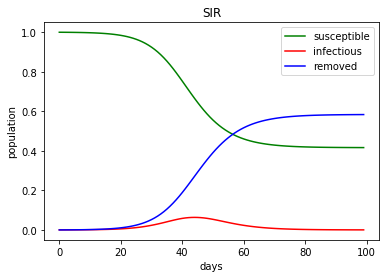

In [115]:
plt.plot(sol.t, sol.y[0], label="susceptible", c='g')
plt.plot(sol.t, sol.y[1], label="infectious", c='r')
plt.plot(sol.t, sol.y[2], label="removed", c='b')
plt.title("SIR")
plt.ylabel("population")
plt.xlabel("days")
plt.legend()
plt.show()